In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm

In [2]:
permcrop_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS2_2019.csv', sep=",")
tempcrop_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS2_2019.csv', sep=",")
education_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
labour_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
prod_df = pd.read_csv('../CSVs/Production_NUTS2_2019.csv', sep=",")

# Crops

In [3]:
permcrop_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pcn.crop_name
0,11,Norte,2,2019,255954,Total
1,11,Norte,2,2019,13815,Fresh fruit plantations (excluding citrus plan...
2,11,Norte,2,2019,1257,Citrus plantations
3,11,Norte,2,2019,2619,Fruit plantations (subtropical climate zones)
4,11,Norte,2,2019,73849,Nuts plantations


In [4]:
tempcrop_df.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name
0,11,Norte,2,2019,151107,54566,Total
1,11,Norte,2,2019,38251,34891,Cereals
2,11,Norte,2,2019,1913,6615,Dried pulses
3,11,Norte,2,2019,6841,6597,Temporary grasses and grazings
4,11,Norte,2,2019,96034,28265,Fodder plants


In [5]:
pc_pivot = pd.pivot_table(
    data=permcrop_df,
    index='region_name',
    columns=['pcn.crop_name'],
    values='pc.area'
)
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Total,Vineyards
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,358544.0,36686.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,56754.0,1513.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,168086.0,42234.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,255954.0,81411.0
Região Autónoma da Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,2322.0,719.0
Região Autónoma dos Açores,350.0,116.0,481.0,97.0,0.0,107.0,2574.0,1424.0
Área Metropolitana de Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,16428.0,9266.0


In [6]:
pc_pivot = pc_pivot[['Citrus plantations', 
                     'Fresh fruit plantations (excluding citrus plantations)', 
                     'Fruit plantations (subtropical climate zones)', 
                     'Nuts plantations', 
                     'Olive plantations', 
                     'Other permanent crops', 
                     'Vineyards', 
                     'Total']]

In [7]:
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0
Região Autónoma da Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0
Região Autónoma dos Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0
Área Metropolitana de Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0


In [8]:
tc_pivot = pd.pivot_table(
    data=tempcrop_df,
    index='region_name',
    columns=['tcn.crop_name'],
    values='tc.area'
)
tc_pivot

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Sugarbeets,Temporary grasses and grazings,Total
region_name,,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,0.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,0.0,1659.0,12120.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,0.0,13747.0,171887.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,0.0,6841.0,151107.0
Região Autónoma da Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,0.0,7.0,2085.0
Região Autónoma dos Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,0.0,14767.0,42822.0
Área Metropolitana de Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,0.0,1521.0,34812.0


In [9]:
tc_pivot.drop(labels='Sugarbeets', axis=1, inplace=True)

In [10]:
tc_pivot

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total
region_name,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0
Região Autónoma da Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Região Autónoma dos Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Área Metropolitana de Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0


In [11]:
tc_pivot.rename(columns={'Total': 'Total_temp_crop'}, inplace=True)
pc_pivot.rename(columns={'Total': 'Total_perm_crop'}, inplace=True)

In [12]:
total_crops = pc_pivot.join(tc_pivot, on='region_name', how='inner')

In [13]:
total_crops

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total_perm_crop,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total_temp_crop
region_name,,,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0
Região Autónoma da Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Região Autónoma dos Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Área Metropolitana de Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0


In [14]:
total_crops['Total_crop_area'] = total_crops['Total_perm_crop'] + total_crops['Total_temp_crop']

In [15]:
total_crops[['Total_perm_crop', 'Total_temp_crop', 'Total_crop_area']]

,Total_perm_crop,Total_temp_crop,Total_crop_area
region_name,,,
Alentejo,358544.0,473551.0,832095.0
Algarve,56754.0,12120.0,68874.0
Centro,168086.0,171887.0,339973.0
Norte,255954.0,151107.0,407061.0
Região Autónoma da Madeira,2322.0,2085.0,4407.0
Região Autónoma dos Açores,2574.0,42822.0,45396.0
Área Metropolitana de Lisboa,16428.0,34812.0,51240.0


In [16]:
total_crops.rename(index={'Região Autónoma da Madeira ': 'Madeira', 'Região Autónoma dos Açores ': 'Açores', 'Área Metropolitana de Lisboa': 'Lisboa'}, inplace=True)

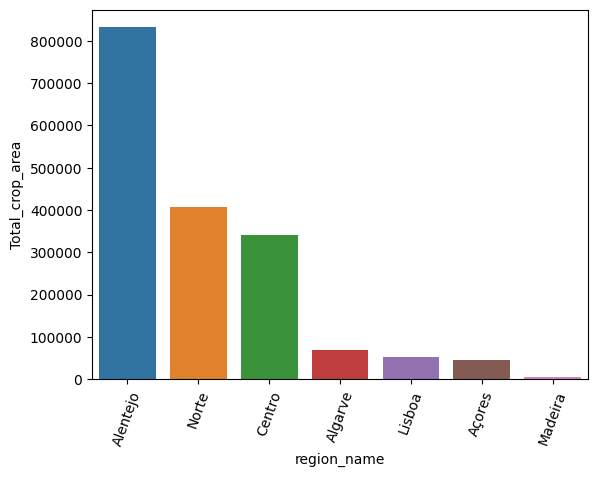

In [17]:
sorted_total_crops = total_crops.sort_values(by='Total_crop_area', ascending=False)


sns.barplot(data=sorted_total_crops[['Total_crop_area']], 
            x=sorted_total_crops.index, 
            y='Total_crop_area',
            hue=sorted_total_crops.index)

plt.xticks(rotation=70)
plt.show()

In [18]:
only_crops = total_crops.drop(['Total_crop_area', 'Total_perm_crop', 'Total_temp_crop'], axis=1)
only_crops.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings
region_name,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0


In [19]:
unpivot_only_crops = pd.melt(only_crops.reset_index(), id_vars=['region_name'], value_vars=only_crops.columns)

In [20]:
unpivot_only_crops.rename({'variable': 'crop_name', 'value': 'area'}, axis=1, inplace=True)

In [21]:
unpivot_only_crops.head()

,region_name,crop_name,area
0,Alentejo,Citrus plantations,2260.0
1,Algarve,Citrus plantations,13951.0
2,Centro,Citrus plantations,1039.0
3,Norte,Citrus plantations,1257.0
4,Madeira,Citrus plantations,118.0


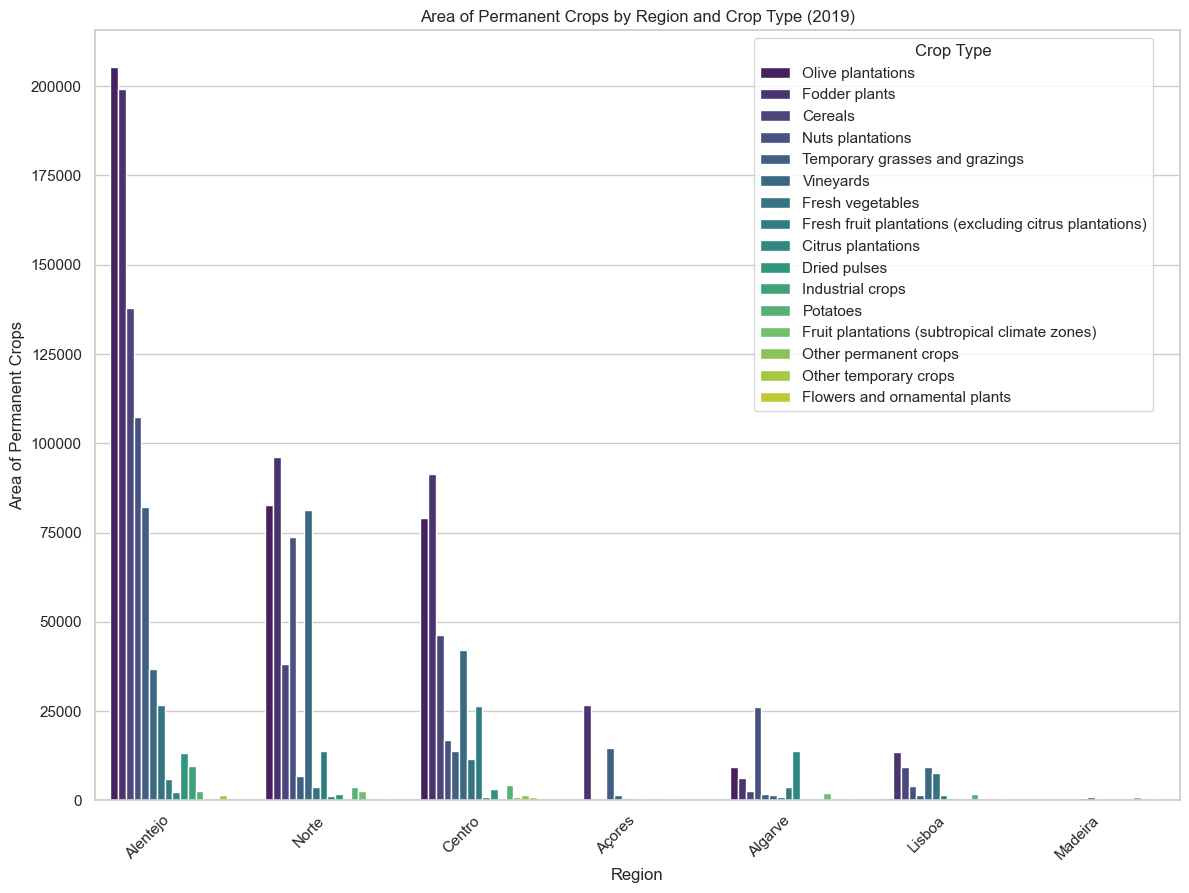

In [22]:
ordered_unpivot = unpivot_only_crops.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='area', hue='crop_name', data=ordered_unpivot, palette="viridis")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Area of Permanent Crops')
plt.title('Area of Permanent Crops by Region and Crop Type (2019)')
plt.legend(title='Crop Type', bbox_to_anchor=(0.6, 1), loc='upper left')

# Show plot
plt.show()